In [100]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

SIM_DIR = './sim_dat/'

In [101]:
sim_names = os.listdir(SIM_DIR)
print sim_names

['man_who_kick_can_static.csv', 'test_naming.csv', 'test_naming_2.csv', 'test_naming_ambiguous.csv', 'woman_in_blue_static.csv', 'woman_kick_man_dyn.csv', 'woman_kick_man_static.csv', 'woman_punch_man_kick_can_dyn.csv', 'woman_punch_man_kick_can_static.csv', 'young_woman_dyn.csv', 'young_woman_punch_man_dyn.csv', 'young_woman_punch_man_static.csv', 'young_woman_static.csv']


In [102]:
dataframes = {}
for name in sim_names:
    input_name = name[:-4]
    dataframes[input_name] = pd.read_csv(SIM_DIR + name)
    dataframes[input_name]['input_name'] = input_name
combined_df = pd.concat(dataframes.values()) # concatenates all the dataframes

In [103]:
# quick data exploration
combined_df.head()

,seed,input_rate,max_time,num_restarts,deact_weight,time_pressure,act_rest,input_name,sub_threshold,coop_weight,...,noise_std,ext_weight,conf_threshold,utterance_intervals,cxn_usage_count,syntactic_complexity,utterance_lengths,requested_info,max_BLEU_score,utterance
0,378948134,100,2000,1,0.0,1.0,0.001,woman_punch_man_kick_can_dyn,0.8,1.0,...,1.0,1.0,0.3,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,378948134,100,2000,1,0.0,1.0,0.001,woman_punch_man_kick_can_dyn,0.8,1.0,...,1.0,10.0,0.3,130.0,8.0,0.250000,6.500000,NaN,1.0,<START><27>man is punch -ed by lady<157>wateri...
2,378948134,100,2000,1,0.0,1.0,0.001,woman_punch_man_kick_can_dyn,0.8,1.0,...,2.0,1.0,0.3,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,378948134,100,2000,1,0.0,1.0,0.001,woman_punch_man_kick_can_dyn,0.8,1.0,...,2.0,10.0,0.3,137.0,8.0,0.250000,6.500000,NaN,1.0,<START><29>man is punch -ed by lady<166>wateri...
4,378948134,100,2000,1,0.0,1.0,0.001,woman_punch_man_kick_can_dyn,0.8,1.0,...,1.0,1.0,0.3,139.0,11.0,0.194444,5.333333,NaN,1.0,<START><51>man is punch -ed by lady<329>man th...


In [104]:
combined_df.describe()  #Get summary of numerical variables

,seed,input_rate,max_time,num_restarts,deact_weight,time_pressure,act_rest,sub_threshold,coop_weight,k,...,start_produce,num_restarts.1,noise_std,ext_weight,conf_threshold,utterance_intervals,cxn_usage_count,syntactic_complexity,utterance_lengths,max_BLEU_score
count,832.0,832.0,832.0,832.0,832.0,832.000000,8.320000e+02,8.320000e+02,832.0,832.000000,...,832.000000,832.0,832.000000,832.000000,8.320000e+02,109.000000,832.000000,464.000000,464.000000,428.000000
mean,378948134.0,100.0,2000.0,1.0,0.0,500.500000,1.000000e-03,8.000000e-01,1.0,5.500000,...,500.500000,1.0,1.500000,5.500000,3.000000e-01,94.045872,2.216346,0.193854,3.611351,0.975293
std,0.0,0.0,0.0,0.0,0.0,499.800451,6.509126e-19,4.443563e-15,0.0,4.502707,...,499.800451,0.0,0.500301,4.502707,4.499108e-15,147.871058,2.685043,0.135688,2.673485,0.069769
min,378948134.0,100.0,2000.0,1.0,0.0,1.000000,1.000000e-03,8.000000e-01,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,3.000000e-01,0.000000,0.000000,0.000000,1.000000,0.714286
25%,378948134.0,100.0,2000.0,1.0,0.0,1.000000,1.000000e-03,8.000000e-01,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,3.000000e-01,NaN,0.000000,NaN,NaN,NaN
50%,378948134.0,100.0,2000.0,1.0,0.0,500.500000,1.000000e-03,8.000000e-01,1.0,5.500000,...,500.500000,1.0,1.500000,5.500000,3.000000e-01,NaN,1.000000,NaN,NaN,NaN
75%,378948134.0,100.0,2000.0,1.0,0.0,1000.000000,1.000000e-03,8.000000e-01,1.0,10.000000,...,1000.000000,1.0,2.000000,10.000000,3.000000e-01,NaN,4.000000,NaN,NaN,NaN
max,378948134.0,100.0,2000.0,1.0,0.0,1000.000000,1.000000e-03,8.000000e-01,1.0,10.000000,...,1000.000000,1.0,2.000000,10.000000,3.000000e-01,714.000000,11.000000,0.333333,13.000000,1.000000


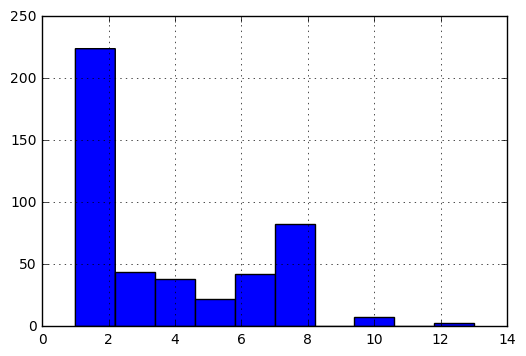

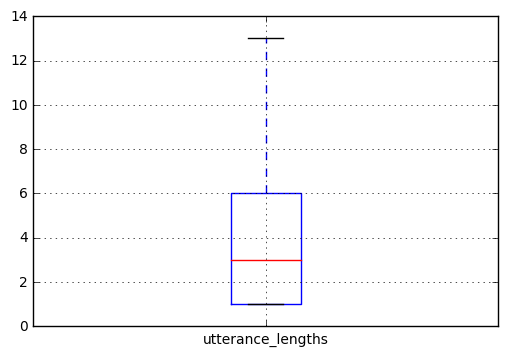

In [105]:
# distribution analysis
plt.figure()
combined_df['utterance_lengths'].hist()
plt.figure()
combined_df.boxplot(column='utterance_lengths',return_type='axes')

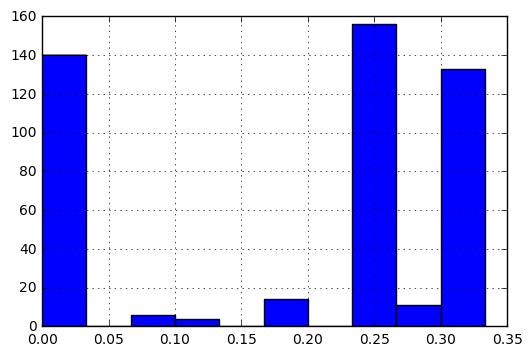

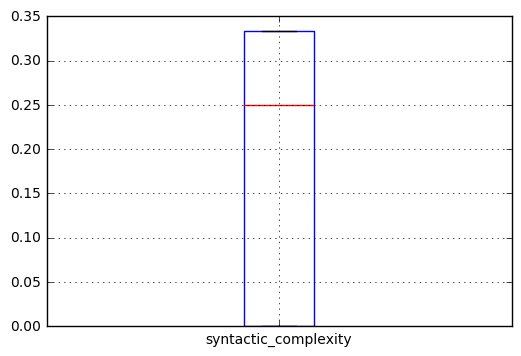

In [106]:
plt.figure()
combined_df['syntactic_complexity'].hist()
plt.figure()
combined_df.boxplot(column='syntactic_complexity', return_type='axes')

OrderedDict([('utterance_lengths',
              <matplotlib.axes._subplots.AxesSubplot at 0x2eef2b70>)])

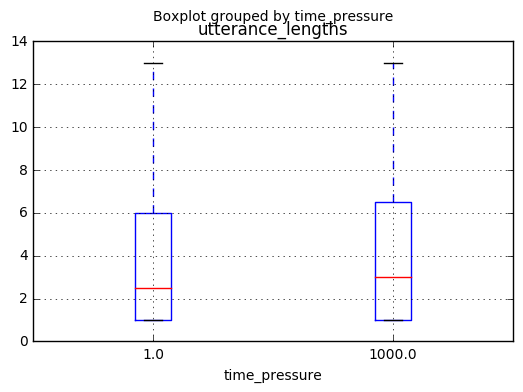

In [107]:
plt.figure()
combined_df.boxplot(column='utterance_lengths', by='time_pressure', return_type='axes')

OrderedDict([('syntactic_complexity',
              <matplotlib.axes._subplots.AxesSubplot at 0x2ece1160>)])

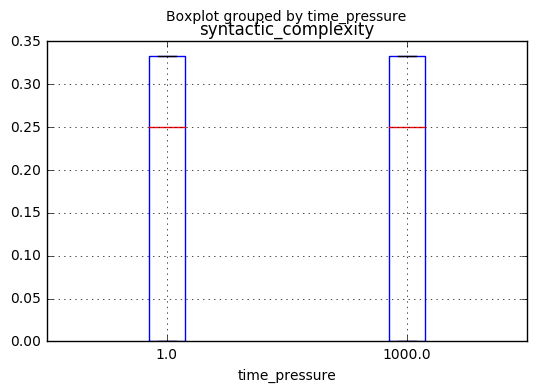

In [108]:
plt.figure()
combined_df.boxplot(column='syntactic_complexity', by='time_pressure', return_type='axes')

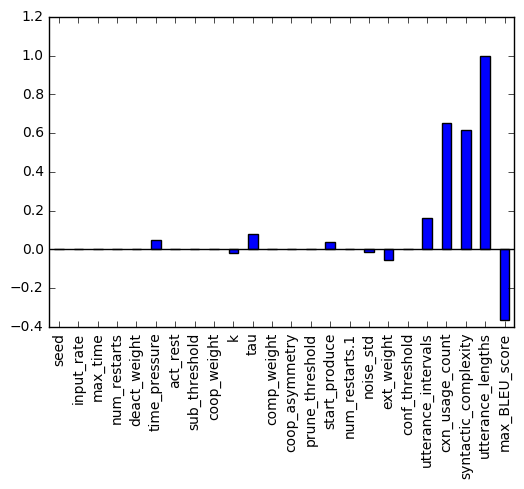

In [109]:
s = combined_df.corr()['utterance_lengths']
plt.figure()
s.plot.bar(); plt.axhline(0, color='k')

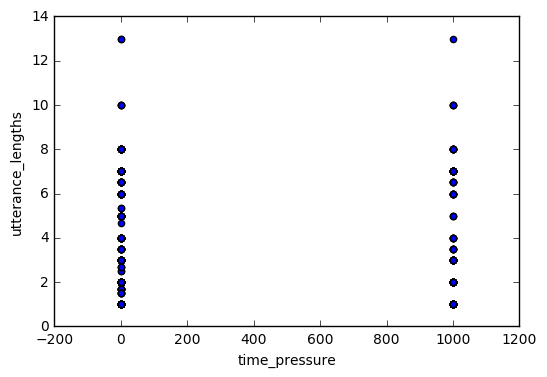

In [110]:
combined_df.plot.scatter(x='time_pressure', y='utterance_lengths')

In [111]:
df = combined_df.groupby('input_name')

input_name
man_who_kick_can_static            Axes(0.125,0.125;0.775x0.775)
test_naming                        Axes(0.125,0.125;0.775x0.775)
test_naming_2                      Axes(0.125,0.125;0.775x0.775)
test_naming_ambiguous              Axes(0.125,0.125;0.775x0.775)
woman_in_blue_static               Axes(0.125,0.125;0.775x0.775)
woman_kick_man_dyn                 Axes(0.125,0.125;0.775x0.775)
woman_kick_man_static              Axes(0.125,0.125;0.775x0.775)
woman_punch_man_kick_can_dyn       Axes(0.125,0.125;0.775x0.775)
woman_punch_man_kick_can_static    Axes(0.125,0.125;0.775x0.775)
young_woman_dyn                    Axes(0.125,0.125;0.775x0.775)
young_woman_punch_man_dyn          Axes(0.125,0.125;0.775x0.775)
young_woman_punch_man_static       Axes(0.125,0.125;0.775x0.775)
young_woman_static                 Axes(0.125,0.125;0.775x0.775)
dtype: object

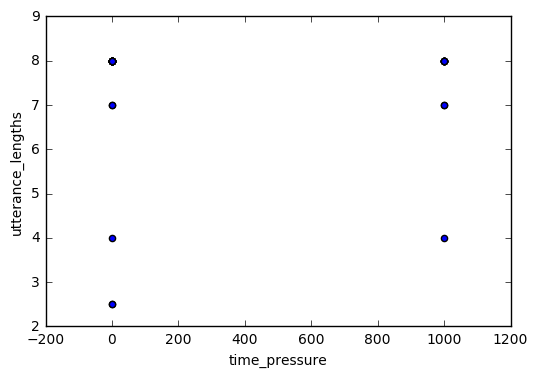

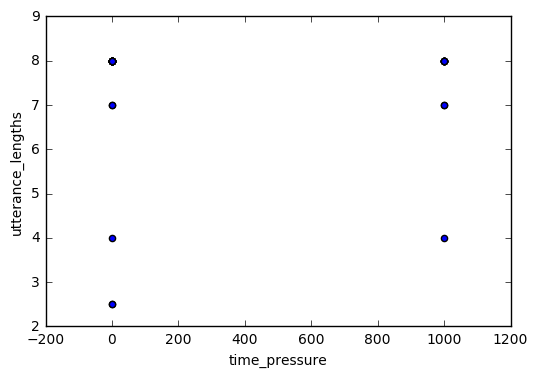

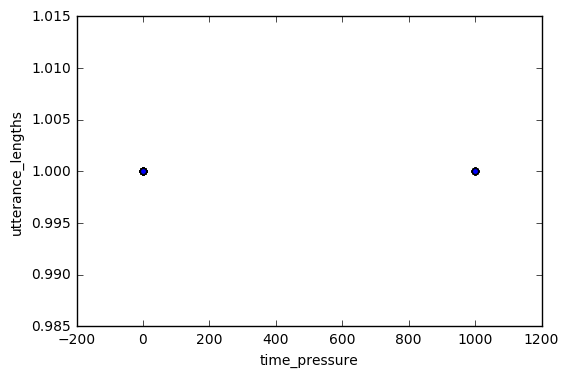

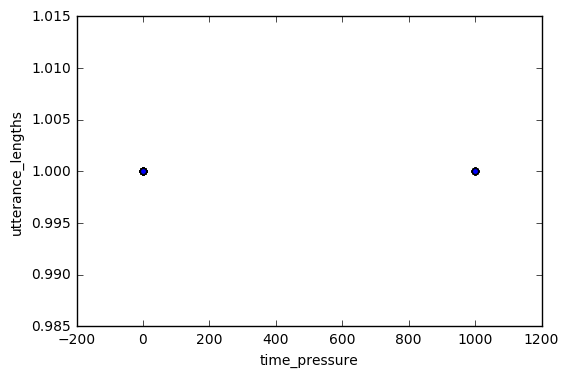

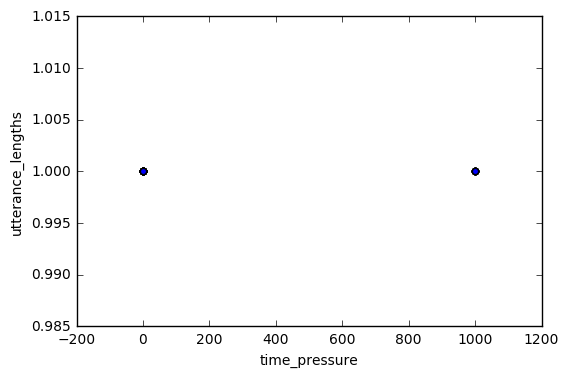

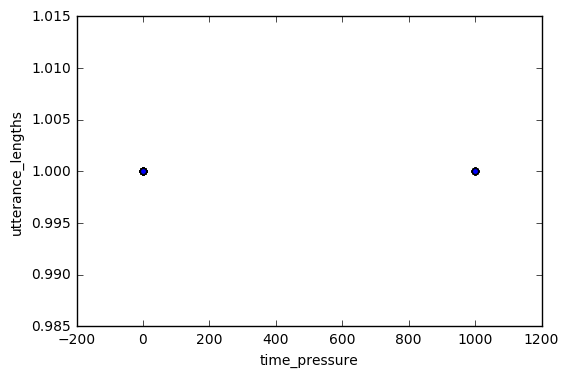

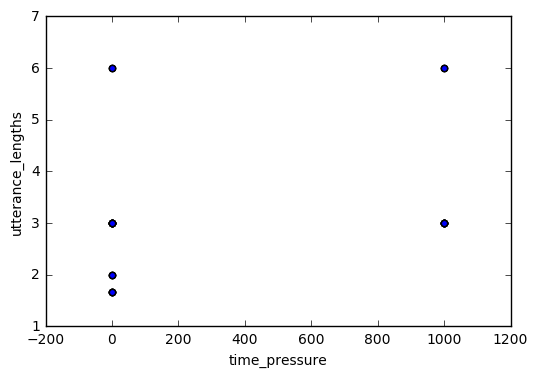

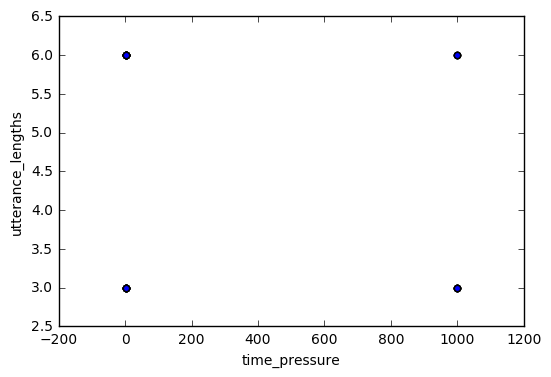

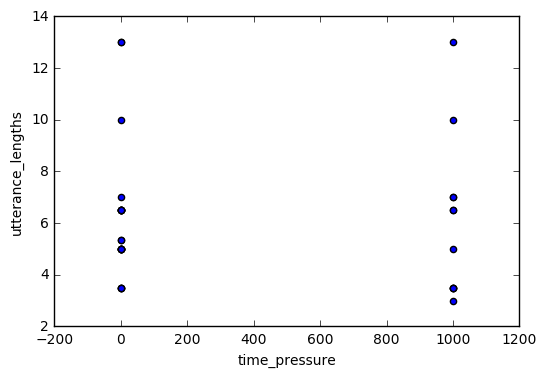

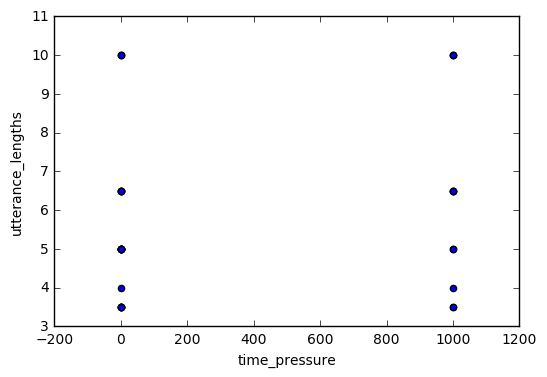

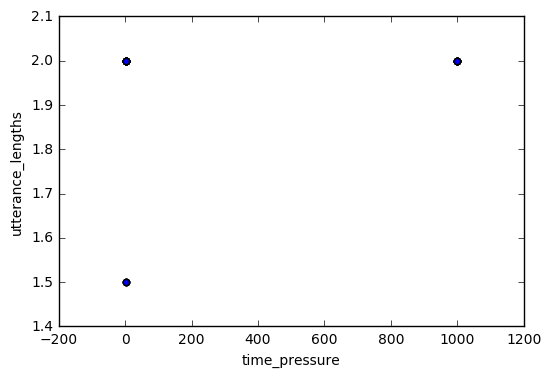

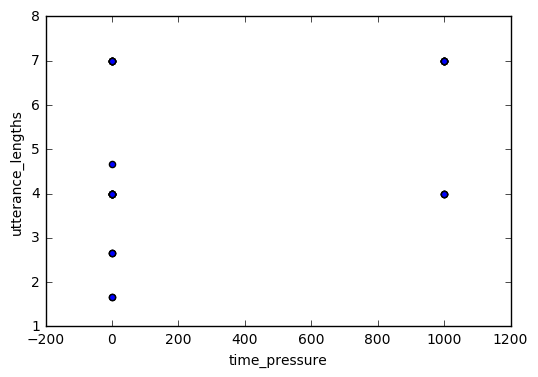

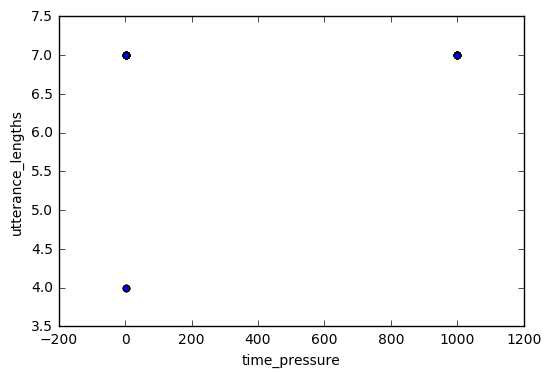

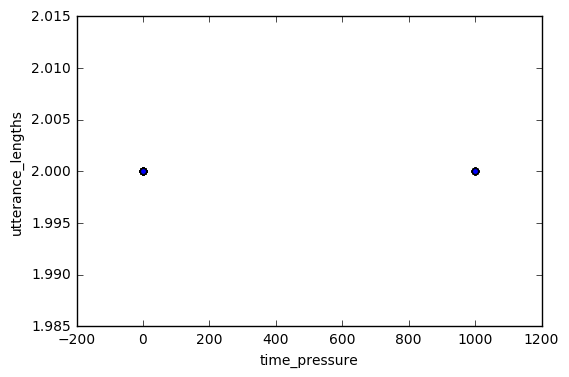

In [112]:
df.plot.scatter(x='time_pressure', y='utterance_lengths')